In [111]:
import numpy as np
import pandas as pd
import pymongo 
from datetime import datetime, timedelta
from pymongo import MongoClient
import ctypes

In [158]:
# Read files
client = MongoClient()
db = client.cmp
collection = db.measures_ts

start = datetime(2021, 3, 1, 0, 0, 0)

df = pd.DataFrame(list(collection.find({
    "timestamp": {"$gte" : start},
    "interface": "GigabitEthernet4/5"
}).sort("timestamp", 1)))
df.head()
#date_time   = pd.to_datetime(df.pop('timestamp'), format='%Y-%m-%d %H:%M.%S')
#timestamp_s = df.pop('ts')
#df.pop('_id')
#df.pop('interface')

_id               timestamp  hrProcessorLoad  \
0  608ba644d4e77d7a560f71ff 2021-03-01 00:00:02.345               11   
1  608ba644d4e77d7a560f72cf 2021-03-01 00:05:01.733               11   
2  608ba644d4e77d7a560f739f 2021-03-01 00:10:02.605               11   
3  608ba644d4e77d7a560f746f 2021-03-01 00:15:02.253               12   
4  608ba644d4e77d7a560f753f 2021-03-01 00:20:02.105               13   

            interface  ifInOctets  ifOutOctets  ifInErrors  ifOutErrors  \
0  GigabitEthernet4/5   298563221   2758491331           0            0   
1  GigabitEthernet4/5   361034303   2824014093           0            0   
2  GigabitEthernet4/5   431373679   2905162919           0            0   
3  GigabitEthernet4/5   499056726   2991818316           0            0   
4  GigabitEthernet4/5   565679558   3050824836           0            0   

   ifInUcastPkts  ifOutUcastPkts  ifOutDiscards             ts  
0     3513647415               0        8960295  1614556802345  
1     3513724660               0        8960295  1614557101733  
2     3513805181               0        8960295  1614557402605  
3     3513883834               0        8960295  1614557702253  
4     3513957437               0        8960295  1614558002105

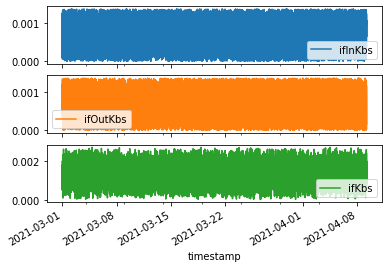

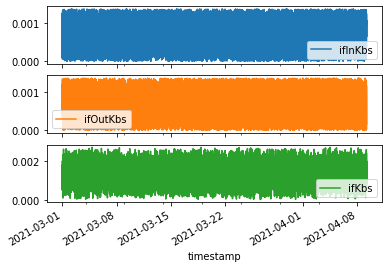

In [159]:
def calcKbs(dt):
    ifSpeed = 10737418240 / 1024
    dt = dt[['ifInOctets', 'ifOutOctets', 'ts']] - dt[['ifInOctets', 'ifOutOctets', 'ts']].shift(1)
    dt.dropna()
    
    dt['ifInOctets']  = dt['ifInOctets'].fillna(0).astype(np.uint32)
    dt['ifOutOctets'] = dt['ifOutOctets'].fillna(0).astype(np.uint32)
    dt['ts'] = dt['ts'].fillna(0).astype(np.uint64)
    dt['ifInKbs']  = ((dt['ifInOctets']  * 8 * 1024) / (dt['ts'] * ifSpeed))
    dt['ifOutKbs'] = ((dt['ifOutOctets'] * 8 * 1024) / (dt['ts'] * ifSpeed))

    dt['ifKbs'] = dt['ifInKbs'] + dt['ifOutKbs']
    #dt['ifInOctets'] = dt['ifInOctets'].fillna(0).astype(np.uint32, errors="ignore")
    #print(dt.dtypes)
    return dt

date_time = pd.to_datetime(df.pop('timestamp'), format='%Y-%m-%d %H:%M.%S')
df = calcKbs(df)
plot_cols = ['ifInKbs', 'ifOutKbs', 'ifKbs']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)